### The National Family Health Survey data set is available at:
https://data.gov.in/catalog/key-indicators-national-family-health-survey-nfhs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import os

Let us read in the data set into a Pandas dataframe and name it "nfhs"

In [2]:
nfhs = pd.read_excel("./NFHS3_4_AllIndia.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


There are a few columns with the heading "False...", we shall drop these columns from our dataframe

In [3]:
nfhs = nfhs[nfhs.columns.drop(list(nfhs.filter(regex='False*')))]

In [11]:
mask_survey = nfhs["Survey"].str.contains("NFHS-4")
mask_area = (nfhs["Area"] == "Total")
print("Total no of rows:", len(nfhs[mask_survey & mask_area]), "; Total no of columns:",len(nfhs.columns))
nfhs[mask_survey & mask_area].head()

Total no of rows: 37 ; Total no of columns: 167


,India/States/UTs,Survey,Area,Population and Household Profile - Population (female) age 6 years and above who ever attended school (%),Population and Household Profile - Population below age 15 years (%),Population and Household Profile - Sex ratio of the total population (females per 1000 males),Population and Household Profile - Sex ratio at birth for children born in the last five years (females per 1000 males),Population and Household Profile - Children under age 5 years whose birth was registered (%),Population and Household Profile - Households with electricity (%),Population and Household Profile - Households with an improved drinking-water source (%),...,Note of : Women Age 15-49 Years Who Have Ever Undergone Examinations of: - Breast (%),Note of : Women Age 15-49 Years Who Have Ever Undergone Examinations of: - Oral cavity (%),Note of : Knowledge of HIV/AIDS among Adults (age 15-49 years) - Women who have comprehensive knowledge of HIV/AIDS (%),Note of : Knowledge of HIV/AIDS among Adults (age 15-49 years) - Men who have comprehensive knowledge of HIV/AIDS (%),Note of : Knowledge of HIV/AIDS among Adults (age 15-49 years) - Women who know that consistent condom use can reduce the chances of getting HIV/AIDS (%),Note of : Knowledge of HIV/AIDS among Adults (age 15-49 years) - Men who know that consistent condom use can reduce the chances of getting HIV/AIDS (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Men who use any kind of tobacco (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Men who consume alcohol (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Women who tried to stop smoking or using tobacco in any other form during the past 12 months (%),Note of : Tobacco Use and Alcohol Consumption among Adults (age 15-49 years) - Men who tried to stop smoking or using tobacco in any other form (during the past 12 months) %
0,India,NFHS-4,Total,68.8,28.6,991.0,919.0,79.7,88.2,89.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andhra Pradesh,NFHS-4,Total,62.0,23.7,1020.0,914.0,82.7,98.8,72.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Assam,NFHS-4,Total,75.0,30.3,993.0,929.0,94.2,78.2,83.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Bihar,NFHS-4,Total,56.9,39.3,1062.0,934.0,60.7,58.6,98.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Chattisgarh,NFHS-4,Total,67.6,29.2,1019.0,977.0,86.1,95.6,91.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def bar_chart(data, colno1=5, colno2=6, ylabel="", title="", wd=15, ht=15, width=0.1, 
              y2min=0, y2max=1.):
    N = len(data)
    ind = np.arange(N)  # the x locations for the groups
    col_values1 = data.iloc[:, colno1].values
    col_values2 = data.iloc[:, colno2].values
    
    width = width       # the width of the bars
    fig, ax = plt.subplots(figsize=(wd,ht))
    ax2 = ax.twinx()
    
    rects1 = ax.bar(ind, col_values1, width, color='r')
    
    rects2 = ax2.bar(ind + width, col_values2, width, color='b')
    
    ylabel1 = data.columns[colno1]
    ylabel2 = data.columns[colno2]
    ax.set_ylabel(ylabel1, color='r')
    ax2.set_ylabel(ylabel2, color='b')
    #ax2.set_ylim(y2min, y2max)
    ax.set_title(title)
    ax.set_xticks(ind + width)
    ax.set_xticklabels(data.iloc[:,0].values, rotation='vertical')
    
    plt.show();

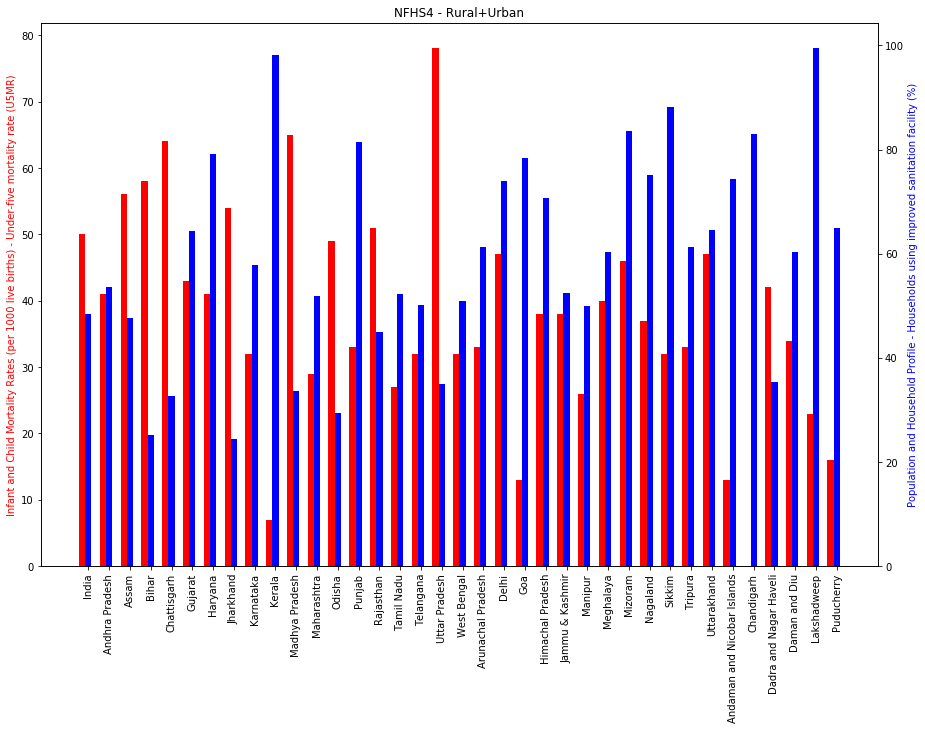

In [13]:
bar_chart(nfhs[mask_survey & mask_area], colno1=22, colno2=10, ht=10, width=0.3, 
          title="NFHS4 - Rural+Urban")